 ## Practica 1:    

## Victor Marinas González

## Africa Economic, Banking and Systemic Crisis Data




El conjunto de datos se centra específicamente en las crisis bancarias, de deuda, financieras, de inflación y sistémicas que ocurrieron, de 1860 a 2014, en 13 países africanos, incluidos: Argelia, Angola, República Centroafricana, Costa de Marfil, Egipto, Kenia, Mauricio, Marruecos, Nigeria, Sudáfrica, Túnez, Zambia y Zimbabwe.

 ### Variables:

**Descripción  una a una las variables:**
 
**case** Número que denota un país específico

**cc3** Código del país

**country** Nombre del país

**year** Año de la observacion

**systemic_crisis** "0" significa que no se produjo una crisis sistémica en el año y "1" significa que se produjo una crisis sistémica en el año.

**exch_usd** El tipo de cambio del país frente al USD


**domestic_debt_in_default** "0" significa que no hubo incumplimiento de la deuda interna soberana en el año y "1" significa que ocurrió un incumplimiento de la deuda interna soberana en el año


**sovereign_external_debt_default**  "0" significa que no hubo incumplimiento de deuda externa soberana en el año y "1" significa que ocurrió un incumplimiento de deuda externa soberana en el año.

**gdp_weighted_default** "0" significa que no hubo incumplimiento de deuda externa soberana en el año y "1" significa que ocurrió un incumplimiento de deuda externa soberana en el año.


**inflation_annual_cpi** La tasa de inflación anual del IPC

**inflation_crises** "0" significa que no hubo crisis de inflación en el año y "1" significa que ocurrió una crisis de inflación en el año

**banking_crisis** "no_crisis" significa que no se produjo una crisis bancaria en el año y "crisis" significa que se produjo una crisis bancaria en el año

## **Analisis Exploratorio de los Datos:**

**Cargamos las  correspondientes librerias :**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler



**Importamos los datos con los que vamos a trabajar:**

In [2]:

datos = pd.read_csv("african_crises.csv")
print(datos)

      case  cc3   country  year  systemic_crisis      exch_usd  \
0        1  DZA   Algeria  1870                1  5.226400e-02   
1        1  DZA   Algeria  1871                0  5.279800e-02   
2        1  DZA   Algeria  1872                0  5.227400e-02   
3        1  DZA   Algeria  1873                0  5.168000e-02   
4        1  DZA   Algeria  1874                0  5.130800e-02   
5        1  DZA   Algeria  1875                0  5.154600e-02   
6        1  DZA   Algeria  1876                0  5.186700e-02   
7        1  DZA   Algeria  1877                0  5.186700e-02   
8        1  DZA   Algeria  1878                0  5.194800e-02   
9        1  DZA   Algeria  1879                0  5.202900e-02   
10       1  DZA   Algeria  1880                0  5.235600e-02   
11       1  DZA   Algeria  1881                0  5.202900e-02   
12       1  DZA   Algeria  1882                0  5.076100e-02   
13       1  DZA   Algeria  1883                0  5.200200e-02   
14       1

In [3]:
list(datos)

['case',
 'cc3',
 'country',
 'year',
 'systemic_crisis',
 'exch_usd',
 'domestic_debt_in_default',
 'sovereign_external_debt_default',
 'gdp_weighted_default',
 'inflation_annual_cpi',
 'independence',
 'currency_crises',
 'inflation_crises',
 'banking_crisis']

**Observamos el tipo de las variables :**

In [4]:
datos.dtypes

case                                 int64
cc3                                 object
country                             object
year                                 int64
systemic_crisis                      int64
exch_usd                           float64
domestic_debt_in_default             int64
sovereign_external_debt_default      int64
gdp_weighted_default               float64
inflation_annual_cpi               float64
independence                         int64
currency_crises                      int64
inflation_crises                     int64
banking_crisis                      object
dtype: object

**Creamos una nueva base de datos eliminando las variables "object" 
y la variable "gdp_weighted_default" que solo adopta el valor 0.**

In [5]:
new_datos = datos.drop(['country','cc3','gdp_weighted_default', "banking_crisis"],axis=1)
new_datos.head(10)

case  year  systemic_crisis  exch_usd  domestic_debt_in_default  \
0     1  1870                1  0.052264                         0   
1     1  1871                0  0.052798                         0   
2     1  1872                0  0.052274                         0   
3     1  1873                0  0.051680                         0   
4     1  1874                0  0.051308                         0   
5     1  1875                0  0.051546                         0   
6     1  1876                0  0.051867                         0   
7     1  1877                0  0.051867                         0   
8     1  1878                0  0.051948                         0   
9     1  1879                0  0.052029                         0   

   sovereign_external_debt_default  inflation_annual_cpi  independence  \
0                                0              3.441456             0   
1                                0             14.149140             0   
2                                0             -3.718593             0   
3                                0             11.203897             0   
4                                0             -3.848561             0   
5                                0            -20.924178             0   
6                                0             -1.769547             0   
7                                0             29.116045             0   
8                                0             -1.492537             0   
9                                0            -16.831357             0   

   currency_crises  inflation_crises  
0                0                 0  
1                0                 0  
2                0                 0  
3                0                 0  
4                0                 0  
5                0                 0  
6                0                 0  
7                0                 1  
8                0                 0  
9                0                 0

**Creamos la matriz de correlaccion :**

In [6]:

new_datos.corr()

case      year  systemic_crisis  \
case                             1.000000  0.115574         0.010991   
year                             0.115574  1.000000         0.197450   
systemic_crisis                  0.010991  0.197450         1.000000   
exch_usd                        -0.231976  0.248757         0.202687   
domestic_debt_in_default         0.128358  0.136828         0.122158   
sovereign_external_debt_default -0.039262  0.271890         0.249850   
inflation_annual_cpi             0.044762  0.037035         0.106452   
independence                     0.021858  0.407360         0.147083   
currency_crises                  0.095339  0.189390         0.112751   
inflation_crises                 0.006405  0.098630         0.172562   

                                 exch_usd  domestic_debt_in_default  \
case                            -0.231976                  0.128358   
year                             0.248757                  0.136828   
systemic_crisis                  0.202687                  0.122158   
exch_usd                         1.000000                  0.005253   
domestic_debt_in_default         0.005253                  1.000000   
sovereign_external_debt_default  0.422890                  0.464751   
inflation_annual_cpi            -0.011947                  0.151832   
independence                     0.126034                  0.109120   
currency_crises                 -0.056472                  0.227585   
inflation_crises                -0.063783                  0.224429   

                                 sovereign_external_debt_default  \
case                                                   -0.039262   
year                                                    0.271890   
systemic_crisis                                         0.249850   
exch_usd                                                0.422890   
domestic_debt_in_default                                0.464751   
sovereign_external_debt_default                         1.000000   
inflation_annual_cpi                                    0.072609   
independence                                            0.228192   
currency_crises                                         0.199428   
inflation_crises                                        0.187930   

                                 inflation_annual_cpi  independence  \
case                                         0.044762      0.021858   
year                                         0.037035      0.407360   
systemic_crisis                              0.106452      0.147083   
exch_usd                                    -0.011947      0.126034   
domestic_debt_in_default                     0.151832      0.109120   
sovereign_external_debt_default              0.072609      0.228192   
inflation_annual_cpi                         1.000000      0.016569   
independence                                 0.016569      1.000000   
currency_crises                              0.076590      0.086376   
inflation_crises                             0.080060     -0.022548   

                                 currency_crises  inflation_crises  
case                                    0.095339          0.006405  
year                                    0.189390          0.098630  
systemic_crisis                         0.112751          0.172562  
exch_usd                               -0.056472         -0.063783  
domestic_debt_in_default                0.227585          0.224429  
sovereign_external_debt_default         0.199428          0.187930  
inflation_annual_cpi                    0.076590          0.080060  
independence                            0.086376         -0.022548  
currency_crises                         1.000000          0.393376  
inflation_crises                        0.393376          1.000000

**Representacion matriz de correlaccion:**

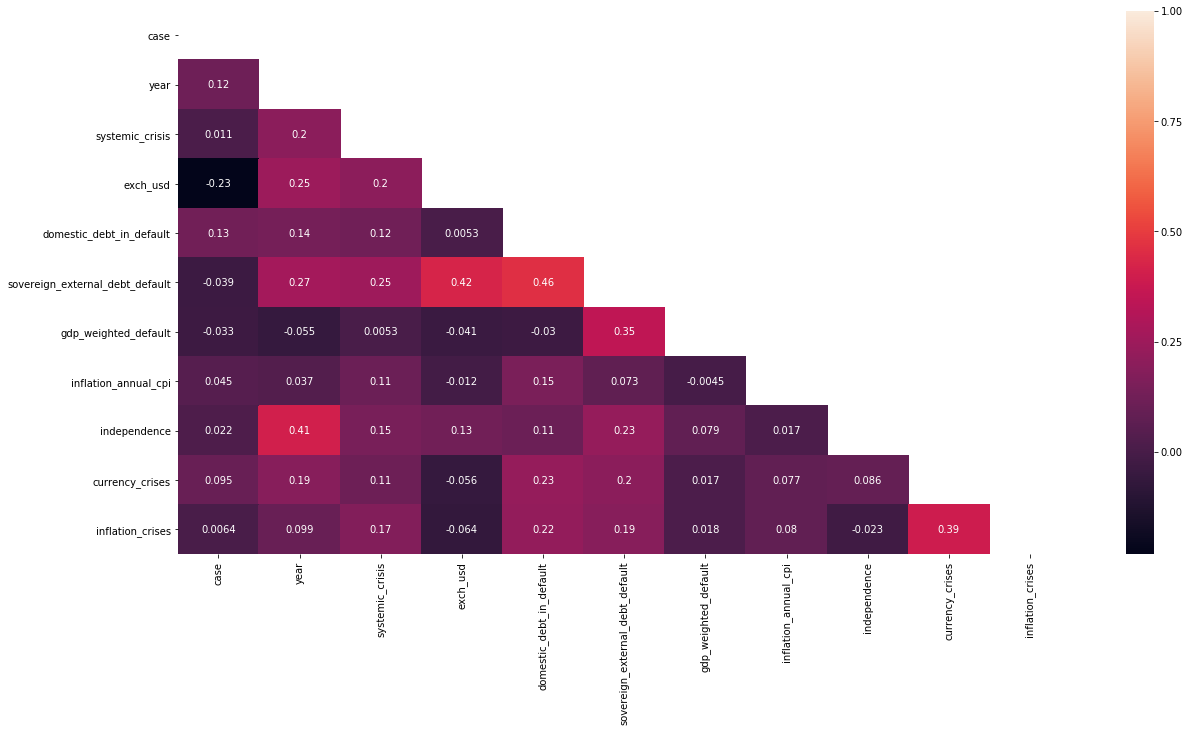

In [7]:
mask = np.zeros_like(datos.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap (datos.corr(), mask = mask, annot = True)
plt.gcf().set_size_inches(20,10)
plt.show()



Podemos obaservar que existe correlaccion con la variable "sovereign_external_debt_default "
respecto a las variables "exch_usd" (0,42) y "domestic_debt_in_default " (0,46).

En las demás variables la correlacción es muy baja

**Histograma con las variables :**

<function matplotlib.pyplot.show(*args, **kw)>

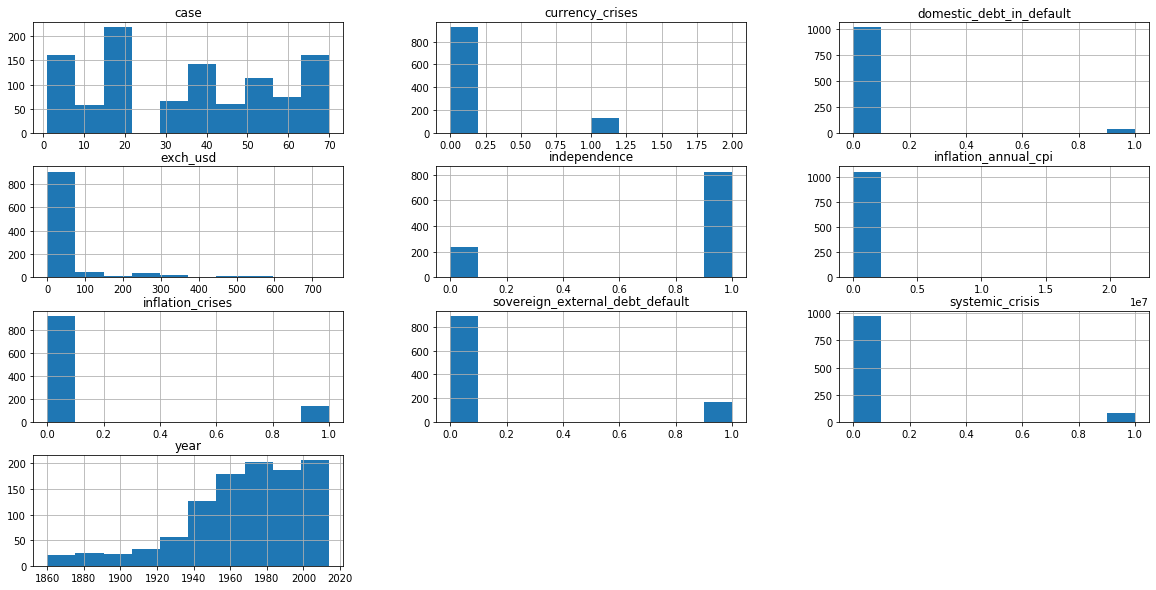

In [8]:
new_datos.hist()
plt.gcf().set_size_inches(20,10)
plt.show

**Trazamos un gráfico de barras con el número de crisis en cada país:**

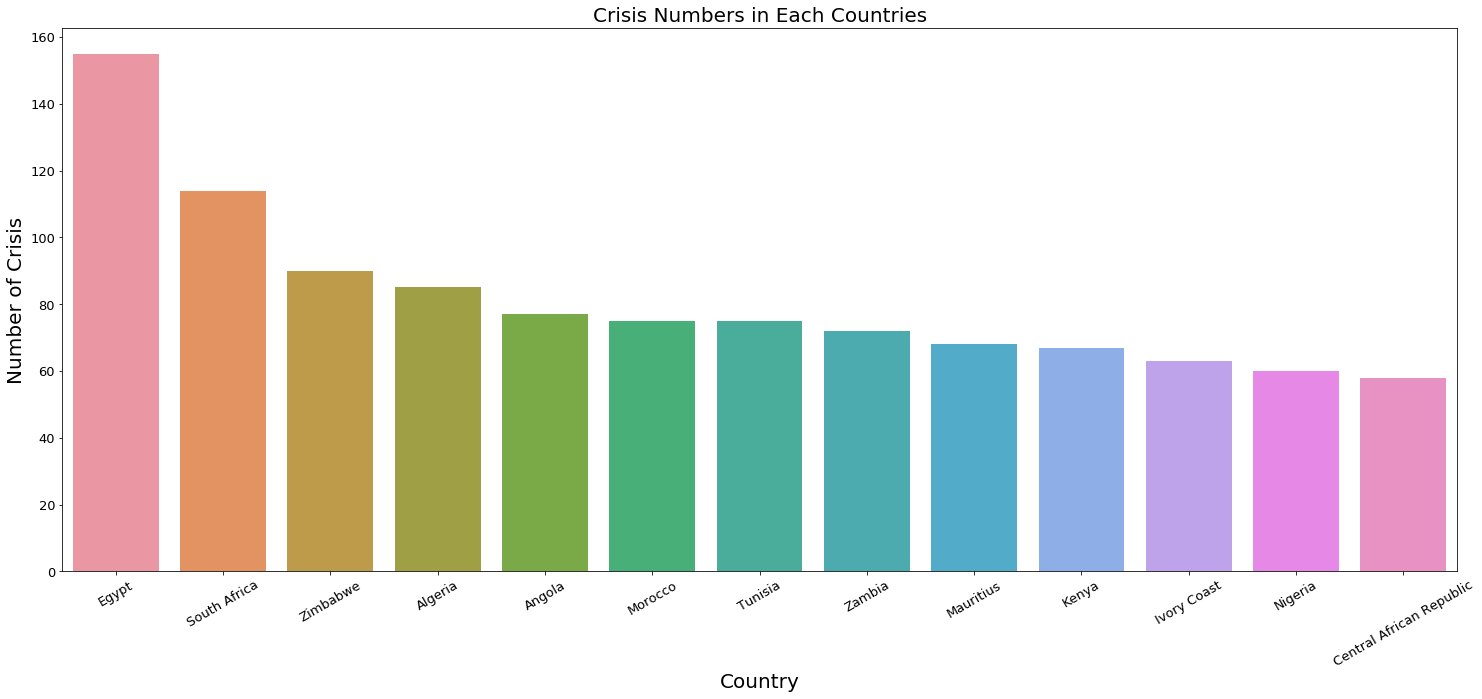

In [9]:
country_count  = datos['country'].value_counts()
country_count = country_count[:15,]
plt.figure(figsize=(25,10))
sns.barplot(country_count.index, country_count.values, alpha=1)
plt.xticks(rotation= 30,fontsize=13)
plt.yticks(rotation= 0,fontsize=13)
plt.title('Crisis Numbers in Each Countries',fontsize=20)
plt.ylabel('Number of Crisis', fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.show() 

**Dummies**

Transformamos la variable "banking_crisis" en dummies, ya que esta variable tenia dos valores,
"crisis" o "no crisis"

In [10]:


df_banking_crisis = pd.get_dummies(datos['banking_crisis'])
df_banking_crisis.head(11)

crisis  no_crisis
0        1          0
1        0          1
2        0          1
3        0          1
4        0          1
5        0          1
6        0          1
7        0          1
8        0          1
9        0          1
10       0          1

In [11]:
#Introducimos la variable dummies, en la nueva base de datos:

df_new = pd.concat([new_datos, df_banking_crisis], axis=1)
df_new.head(11)

case  year  systemic_crisis  exch_usd  domestic_debt_in_default  \
0      1  1870                1  0.052264                         0   
1      1  1871                0  0.052798                         0   
2      1  1872                0  0.052274                         0   
3      1  1873                0  0.051680                         0   
4      1  1874                0  0.051308                         0   
5      1  1875                0  0.051546                         0   
6      1  1876                0  0.051867                         0   
7      1  1877                0  0.051867                         0   
8      1  1878                0  0.051948                         0   
9      1  1879                0  0.052029                         0   
10     1  1880                0  0.052356                         0   

    sovereign_external_debt_default  inflation_annual_cpi  independence  \
0                                 0              3.441456             0   
1                                 0             14.149140             0   
2                                 0             -3.718593             0   
3                                 0             11.203897             0   
4                                 0             -3.848561             0   
5                                 0            -20.924178             0   
6                                 0             -1.769547             0   
7                                 0             29.116045             0   
8                                 0             -1.492537             0   
9                                 0            -16.831357             0   
10                                0              3.881188             0   

    currency_crises  inflation_crises  crisis  no_crisis  
0                 0                 0       1          0  
1                 0                 0       0          1  
2                 0                 0       0          1  
3                 0                 0       0          1  
4                 0                 0       0          1  
5                 0                 0       0          1  
6                 0                 0       0          1  
7                 0                 1       0          1  
8                 0                 0       0          1  
9                 0                 0       0          1  
10                0                 0       0          1

**Outliers // Graficos de dispersion**

Podemos observar las variables atípicas de cada variable:

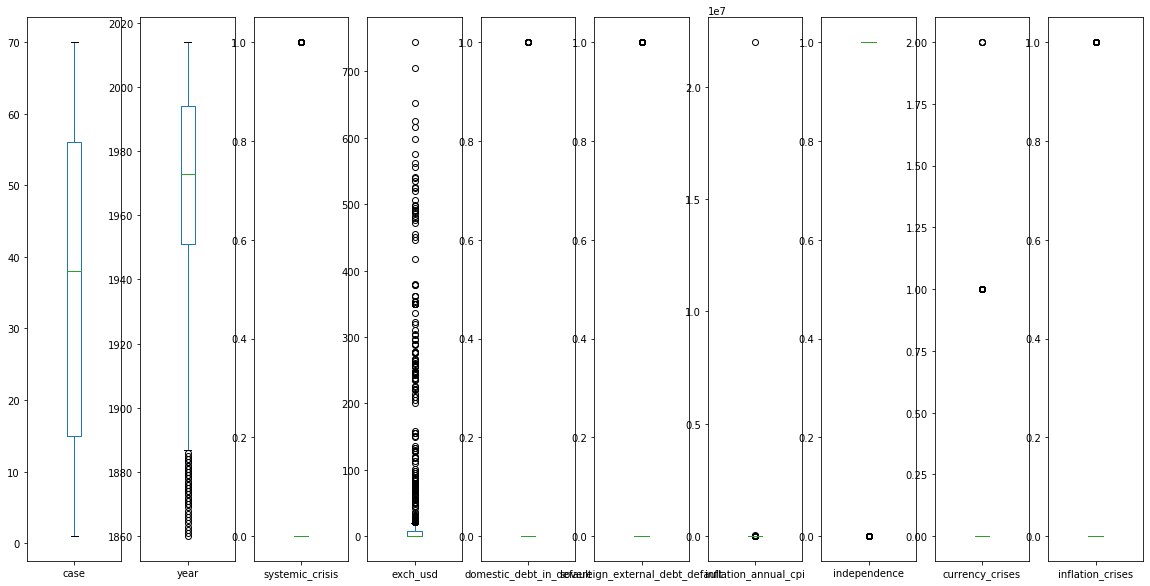

In [12]:


new_datos.plot(kind="box",subplots=True, sharex=False, sharey=False)
plt.gcf().set_size_inches(20,10)
plt.show()



In [13]:
#Analizamos la correlaccion de la variable crisis, con las demas variables
# y observamos la correlaccion, sobretodo con la variable "systemic_crisis"

corr = df_new.corr()
corr[['crisis']].sort_values(by = 'crisis',ascending = False)\
.style.background_gradient()

#

**Cargamos la librería, para realizar el train y test**

In [14]:
from sklearn.model_selection import train_test_split


**Creamos el train y el test, dividiendo la muestra (80% train y 20% test)**

In [15]:
y = df_new.iloc[:, 10]
x = df_new.loc[:, df_new.columns != "crisis"] 

**Utilizamos el  80% para prueba y  el 20% para test**

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)



**Vemos las dimensiones de la partición**

In [17]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(847, 11) (212, 11) (847,) (212,)


**Modelo Lasso**

In [27]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [28]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(x_train, y_train)
lassocv.alpha_

1.0104894386679027e-05

**Realizamos la regresion del modelo**

In [29]:
model_lasso = Lasso(alpha=lassocv.alpha_) #  lasso
model_lasso.fit(x_train, y_train) # ajuste  train
pred_lasso = model_lasso.predict(x_test) #  test
print(np.sqrt(mean_squared_error(y_test,pred_lasso))) # error sobre el test

2.9500011246890543e-05


In [30]:
error_lasso = np.sqrt(mean_squared_error(y_test,pred_lasso))
print(r2_score(y_test, pred_lasso)) 

0.9999999848811187


Obtenemos el error del modelo, y la bondad del ajuste es del 0.999999999, por lo que tenemos un error aproximado a cero, a la hora de determinar si hay crisis o no